## Tarea 14

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [1]:
using PyPlot

In [2]:
## Volvamos a definir el método de Runge-Kutta de orden 4

function RK_4(f,listt,inicial)
    
    h=listt[2]-listt[1]
    x=inicial
    listx=[]
    push!(listx,x)

    for i in 1:length(listt)-1     ## Aplicamos la relación de recurrencia para el método de 4 orden con 4 iteraciones (como en la tarea pasada)
        it1=f(x,listt[i])
        it2=f(x+(h/2)*it1,listt[i]+h/2)
        it3=f(x+(h/2)*it2,listt[i]+h/2)
        it4=f(x+h*it3,listt[i+1])
        
        x=x+(h/6)*(it1+2*it2+2*it3+it4)
        push!(listx,x)     ## Guardamos cada valor obtenido en la lista "listx"
    end
   
   return listx
end

RK_4 (generic function with 1 method)

Consideremos el sistema propuesto al inicio, tomando:

$\frac{d\vec{x}}{d t}=\vec{F}(\vec{x},t), \quad con \quad \vec{x}= (x, y)^{\text{T}} \quad y \quad \vec{F}(\vec{x},t)=(y-y^3,-x -y^2)^{\text{T}}$

In [3]:
## Definimos la función derivada

F(x,t)=[x[2]-(x[2])^3,-x[1]-(x[2])^2]

F (generic function with 1 method)

In [18]:
## Definamos también la lista de espacio temporal sobre la cual las funciones actuarán

tiempo=0:0.1:100

0.0:0.1:100.0

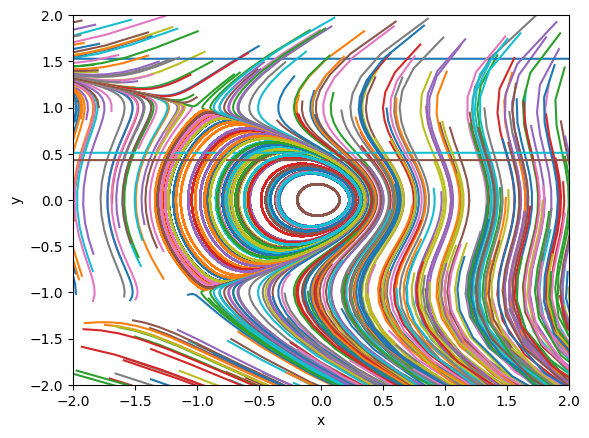

In [19]:
## Usamos el for para poder establer distintas condiciones iniciales y graficarlas
for i in 1:500

    x_0=2*(2*rand()-1)     ## x_0 y y_0 van de -2 a 2 de forma aleatoria
    y_0=2*(2*rand()-1)
    
    lista_x=map(x->x[1],RK_4(F,tiempo,[x_0,y_0]))     ## Usamos la función "map" para obtener las entradas correspondiente
    lista_y=map(x->x[2],RK_4(F,tiempo,[x_0,y_0]))
    
    plot(lista_x,lista_y)
end


axes()[:set_xlim]([-2,2])     ## Se ajustan los límites de los ejes
axes()[:set_ylim]([-2,2])

xlabel("x")
ylabel("y")
show()

Calculemos el jacobiano de nuestra sistema de ecuaciones, para esto expresémoslo como una arreglo de elementos, es decir, un vector (para propósitos del cáluculo del Jacobiano, lo transpondremos):

$\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$.

Notemos ahora que:

$$  J=\left( \begin{array}{cc} 0 & 1-3y^{2} \\-1 & -2y \end{array} \right) $$

Entonces, evaluando en $\vec{0}$ (un punto constante), tenemos que
$$ \left. J\right|_{x=0,y=0}= \left(\begin{array}{cc} 0 & 1 \\-1 & 0 \end{array} \right).$$

De donde, el valor del determinante es $\Delta=1$, mientras que la traza es $Tr=0$. Por lo tanto, $\vec{0}$ se trata de un centro (por la gráfica mostrada en clase). Esto se puede comprobar observando la gráfica anterior.

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?

Considerando $\mu = 0.5$, podemos reescribir al sistema como:

$\dot{x}=u$

y

$\dot{u}=\mu(1-x^2)u-x$

Es decir, $\frac{d \vec x}{d t}=\vec{G}(\vec{x},t),$ con $\vec{x}= (x, u)^{\text{T}}$ y $\vec{G}(\vec{x},t)=(u,\mu(1-x^2)u-x)^{\text{T}}.$

In [6]:
#Definimos la función que nos da la derivada
G(x,t)=[x[2],0.5*(1-(x[1])^2)*x[2]-x[1]]

G (generic function with 1 method)

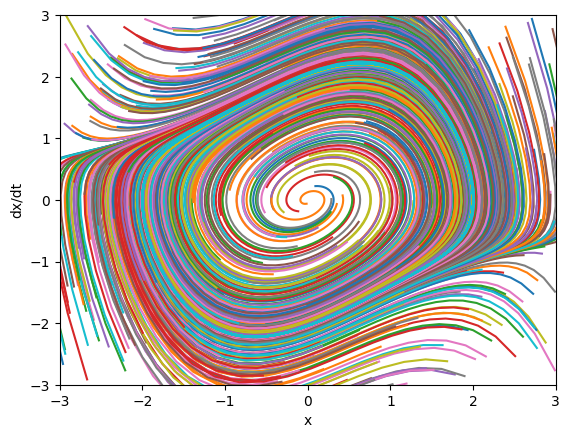

In [22]:
## Nuevamente pedimos distintas condiciones iniciales

for i in 1:500
    x_0=3*(2*rand()-1) ## x_0 y y_0 recorren de -3 a 3 de forma aleatoria
    y_0=3*(2*rand()-1)
    
    lista_x=map(x->x[1],RK_4(G,tiempo,[x_0,y_0])) 
    lista_y=map(x->x[2],RK_4(G,tiempo,[x_0,y_0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-3,3])
axes()[:set_ylim]([-3,3])

xlabel("x")
ylabel("dx/dt")
show()

Notemos ahora que de la función definida anteriormente, $G(x,t)$, se puede ver en la gráfica, que $x=0$ es un punto fijo y al evaluarlo se obtiene una espiral inestable.

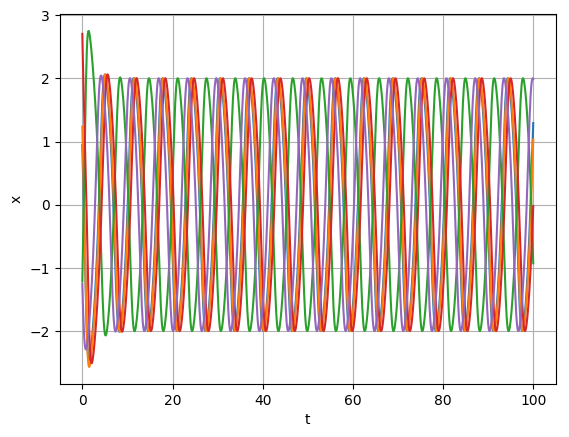

In [31]:
## Consideremos ahora el gráfico de posición contra tiempo

for i in 1:5     ## Ahora solo son 5 para propósitos visuales
    x_0=4*(2*rand()-1)
    y_0=4*(2*rand()-1)
    
    lista_x=map(x->x[1],RK_4(G,tiempo,[x_0,y_0]))
    
    #Graficamos
    plot(tiempo,lista_x)
end

grid("on")
xlabel("t")
ylabel("x")
show()

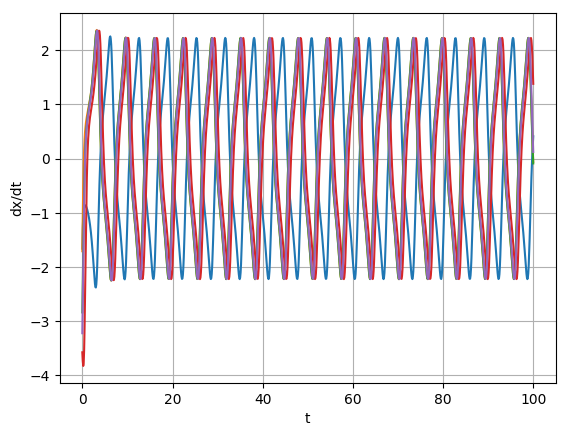

In [30]:
## Consideremos ahora el gráfico de velocidad contra tiempo
for i in 1:5
    x_0=4*(2*rand()-1)
    y_0=4*(2*rand()-1)
    
    lista_y=map(x->x[2],RK_4(G,tiempo,[x_0,y_0]))
    
    plot(tiempo,lista_y)
end

grid("on")
xlabel("t")
ylabel("dx/dt")
show()